In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import plotly.express as px


In [2]:

# Load the dataset
df = pd.read_excel('Prevalence of PCOD in India.xlsx')


In [3]:

# Display the first few rows of the dataset
print(df.head())

     age  height  weight           state physical_activity sleep_time  \
0  20–24  155.00    70.0     West Bengal         0-1 hours  5-6 hours   
1  20–24  159.00    50.0   Uttar Pradesh         4-5 hours  7-8 hours   
2  20–24  170.00    63.0  Madhya Pradesh         0-1 hours  5-6 hours   
3  20–24  170.18    65.0   Uttar Pradesh         4-5 hours  5-6 hours   
4  20–24  154.00    55.0   Uttar Pradesh         2-3 hours  5-6 hours   

                                stress_level pcod_family pcod  
0          High (I frequently feel stressed)         Yes  Yes  
1  Medium (I experience stress occasionally)         Yes   No  
2  Medium (I experience stress occasionally)          No   No  
3               Low (I rarely feel stressed)         Yes  Yes  
4  Medium (I experience stress occasionally)          No   No  


In [4]:
# Summary Statistics of the dataset 
print(df.describe())



           height      weight
count  100.000000  100.000000
mean   158.543400   60.155000
std      7.888577   11.533153
min    124.900000   40.000000
25%    153.750000   50.750000
50%    158.200000   57.500000
75%    163.000000   67.250000
max    180.000000   96.000000


In [5]:
# Data Cleaning and Preprocessing
# Checking for missing values
print(df.isnull().sum())

age                  0
height               0
weight               0
state                0
physical_activity    0
sleep_time           0
stress_level         0
pcod_family          0
pcod                 0
dtype: int64


In [6]:
# Convert age ranges to numerical values
def convert_age(age_range):
	if '–' in age_range:
		age_range = age_range.split('–')
		return (int(age_range[0]) + int(age_range[1])) / 2
	elif '+' in age_range:
		return int(age_range.replace('+', ''))
	else:
		return int(age_range)

df['age'] = df['age'].apply(convert_age)

In [7]:
df.head()

,age,height,weight,state,physical_activity,sleep_time,stress_level,pcod_family,pcod
0,22.0,155.00,70.0,West Bengal,0-1 hours,5-6 hours,High (I frequently feel stressed),Yes,Yes
1,22.0,159.00,50.0,Uttar Pradesh,4-5 hours,7-8 hours,Medium (I experience stress occasionally),Yes,No
2,22.0,170.00,63.0,Madhya Pradesh,0-1 hours,5-6 hours,Medium (I experience stress occasionally),No,No
3,22.0,170.18,65.0,Uttar Pradesh,4-5 hours,5-6 hours,Low (I rarely feel stressed),Yes,Yes
4,22.0,154.00,55.0,Uttar Pradesh,2-3 hours,5-6 hours,Medium (I experience stress occasionally),No,No


In [8]:
# Save the original variables
df['pcod_original'] = df['pcod']
df['pcod_family_original'] = df['pcod_family']
df['stress_level_original'] = df['stress_level']
df['state_original'] = df['state']
df['physical_activity_original'] = df['physical_activity']
df['sleep_time_original'] = df['sleep_time']

# Encoding categorical variables
label_encoder = LabelEncoder()
df['pcod'] = label_encoder.fit_transform(df['pcod'])
df['pcod_family'] = label_encoder.fit_transform(df['pcod_family'])
df['stress_level'] = label_encoder.fit_transform(df['stress_level'])
df['state'] = label_encoder.fit_transform(df['state'])

# Convert physical_activity and sleep_time to numerical values
physical_activity_mapping = {
	'0-1 hours': 1,
	'2-3 hours': 2,
	'4-5 hours': 3,
	'6+ hours': 4
}
sleep_time_mapping = {
	'Less than 5 hours': 1,
	'5-6 hours': 2,
	'7-8 hours': 3,
	'More than 8 hours': 4
}
df['physical_activity'] = df['physical_activity'].map(physical_activity_mapping)
df['sleep_time'] = df['sleep_time'].map(sleep_time_mapping)


In [9]:
df.head()
df.to_csv('PCOD.csv', index=False)

In [10]:


#doing EDA on the dataset by ploty

# Distribution of age
fig = px.histogram(df, x='age', title='Distribution of Age')
fig.show()

In [11]:
# Distribution of BMI
#calculation of BMI
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
fig = px.histogram(df, x='bmi', title='Distribution of BMI')
fig.show()

In [12]:

# Distribution of Stress Level
fig = px.histogram(df, x='stress_level_original', title='Distribution of Stress Level')
fig.show()

In [13]:
# Distribution of Numerical Features
numerical_features = ['age', 'height', 'weight']
for feature in numerical_features:
    fig = px.histogram(df, x=feature, title=f'Distribution of {feature}', marginal="box", nbins=30)
    fig.show()

In [14]:
# Distribution of Categorical Features keeping Origial lables
categorical_features = ['pcod_original', 'pcod_family_original', 'stress_level_original', 'state_original', 'physical_activity_original', 'sleep_time_original']
for feature in categorical_features:
    fig = px.histogram(df, x=feature, title=f'Distribution of {feature}')
    fig.show()
    


In [15]:
#Target variable is pcod
#Pair plot of the dataset by ploty
fig = px.scatter_matrix(df, dimensions=['age', 'height', 'weight', 'bmi'], color='pcod_original')
fig.show()

In [16]:
#make violin plot of all variable of the dataset by ploty
fig = px.violin(df, y='age', x='pcod_original', box=True, points="all", title='Age vs PCOD')
fig.show()
fig = px.violin(df, y='height', x='pcod_original', box=True, points="all", title='Height vs PCOD')
fig.show()
fig = px.violin(df, y='weight', x='pcod_original', box=True, points="all", title='Weight vs PCOD')
fig.show()
fig = px.violin(df, y='bmi', x='pcod_original', box=True, points="all", title='BMI vs PCOD')
fig.show()
fig = px.violin(df, y='stress_level', x='pcod_original', box=True, points="all", title='Stress Level vs PCOD')
fig.show()
fig = px.violin(df, y='physical_activity', x='pcod_original', box=True, points="all", title='Physical Activity vs PCOD')
fig.show()
fig = px.violin(df, y='sleep_time', x='pcod_original', box=True, points="all", title='Sleep Time vs PCOD')
fig.show()
fig = px.violin(df, y='pcod_family', x='pcod_original', box=True, points="all", title='PCOD Family vs PCOD')
fig.show()


In [17]:
# Interactive Filtering of the dataset by ploty
fig = px.scatter(df, x='age', y='weight', color='pcod', title='Age vs Weight with PCOD')
fig.show()
fig = px.scatter(df, x='height', y='weight', color='pcod', title='Height vs Weight with PCOD')
fig.show()
fig = px.scatter(df, x='bmi', y='weight', color='pcod', title='BMI vs Weight with PCOD')
fig.show()
fig = px.scatter(df, x='stress_level_original', y='weight', color='pcod', title='Stress Level vs Weight with PCOD')
fig.show()
fig = px.scatter(df, x='physical_activity_original', y='weight', color='pcod', title='Physical Activity vs Weight with PCOD')
fig.show()
fig = px.scatter(df, x='sleep_time_original', y='weight', color='pcod', title='Sleep Time vs Weight with PCOD')
fig.show()
fig = px.scatter(df, x='pcod_family_original', y='weight', color='pcod', title='PCOD Family vs Weight with PCOD')
fig.show()
fig = px.scatter(df, x='state_original', y='weight', color='pcod', title='State vs Weight with PCOD')
fig.show()



In [18]:
# Outlier Detection
for feature in numerical_features:
    fig = px.box(df, y=feature, title=f'Outlier Detection in {feature}')
    fig.show()

In [28]:
#Making a new dataframe for model building droppinh the original columns
df_model = df.drop(['pcod_original', 'pcod_family_original', 'stress_level_original', 'state_original', 'physical_activity_original', 'sleep_time_original'], axis=1)

df_model.to_csv('PCOD_model.csv', index=False)
df_model.head()

,age,height,weight,state,physical_activity,sleep_time,stress_level,pcod_family,pcod,bmi
0,22.0,155.00,70.0,12,1,2,0,1,1,29.136316
1,22.0,159.00,50.0,11,3,3,2,1,0,19.777699
2,22.0,170.00,63.0,9,1,2,2,0,0,21.799308
3,22.0,170.18,65.0,11,3,2,1,1,1,22.443796
4,22.0,154.00,55.0,11,2,2,2,0,0,23.191095


In [20]:
# Correlation Matrix of the dataset using ploty interactive plot with heatmap
fig = px.imshow(df_model.corr(), title='Correlation Matrix')
fig.show()


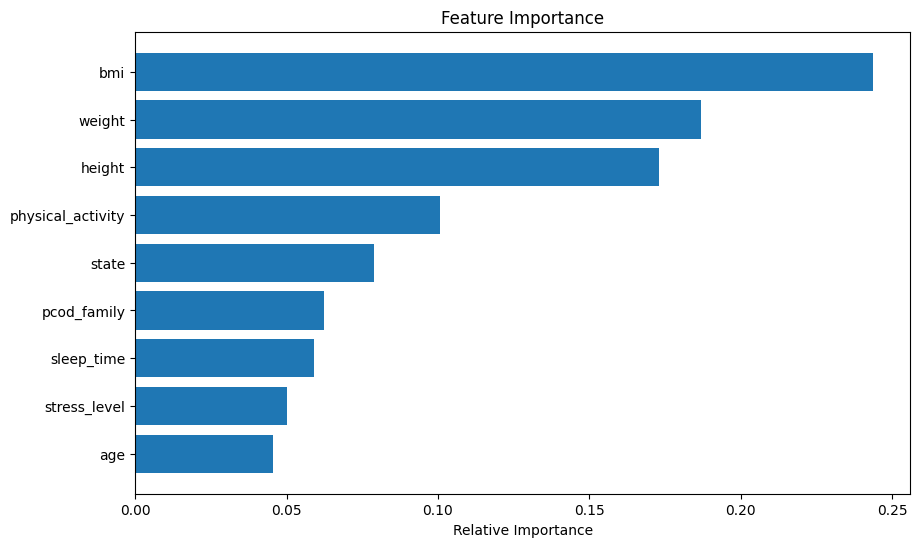

In [21]:
# feature importance using Random Forest Classifier
X = df_model.drop('pcod', axis=1)
y = df_model['pcod']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [22]:
# K Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_model)
df_model['cluster'] = kmeans.labels_
fig = px.scatter(df_model, x='height', y='weight', color='cluster', title='K Means Clustering')
fig.show()
fig = px.scatter(df_model, x='bmi', y='weight', color='cluster', title='K Means Clustering')
fig.show()
fig = px.scatter(df_model, x='age', y='weight', color='cluster', title='K Means Clustering')
fig.show()
fig = px.scatter(df_model, x='stress_level', y='weight', color='cluster', title='K Means Clustering')
fig.show()
fig = px.scatter(df_model, x='physical_activity', y='weight', color='cluster', title='K Means Clustering')
fig.show()
fig = px.scatter(df_model, x='sleep_time', y='weight', color='cluster', title='K Means Clustering')
fig.show()
fig = px.scatter(df_model, x='pcod_family', y='weight', color='cluster', title='K Means Clustering')
fig.show()



In [23]:
#PCA analysis and visualization in 3D graph of the dataset and the clusters formed by KMeans Clustering and interpreting the results
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_model)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['cluster'] = df_model['cluster']
fig = px.scatter(principal_df, x='PC1', y='PC2', color='cluster', title='PCA Analysis')
fig.show()


Model: Logistic Regression
Accuracy: 0.65
Confusion Matrix: [[9 3]
 [4 4]]




c:\Users\swaga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



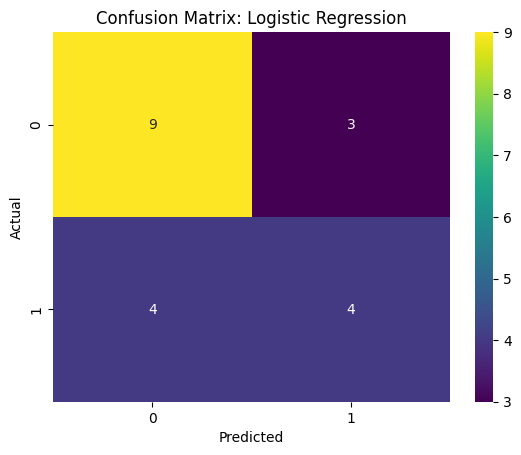

Model: Support Vector Machine
Accuracy: 0.6
Confusion Matrix: [[12  0]
 [ 8  0]]




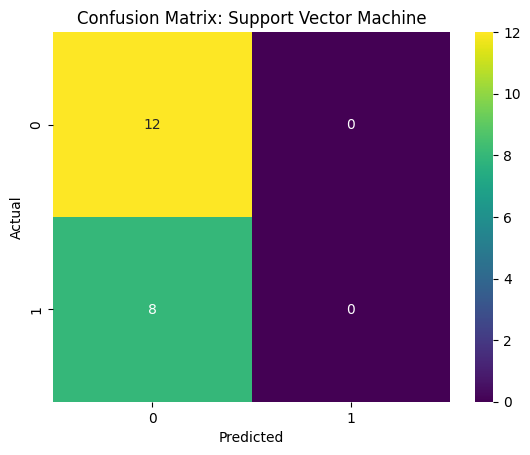

Model: Decision Tree
Accuracy: 0.55
Confusion Matrix: [[7 5]
 [4 4]]




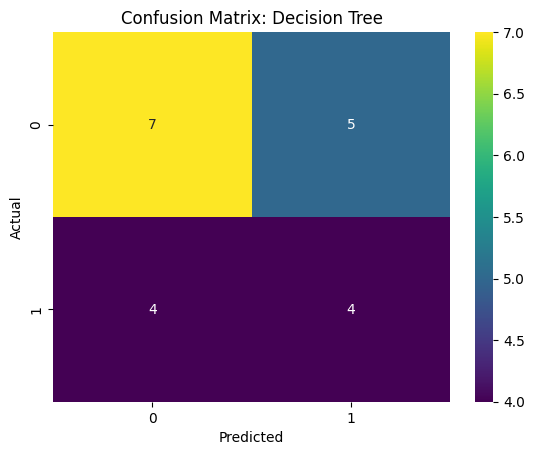

Model: K-Nearest Neighbors
Accuracy: 0.6
Confusion Matrix: [[10  2]
 [ 6  2]]




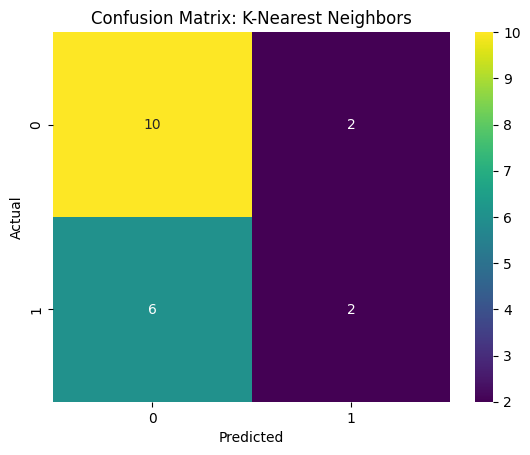

Model: Random Forest
Accuracy: 0.6
Confusion Matrix: [[8 4]
 [4 4]]




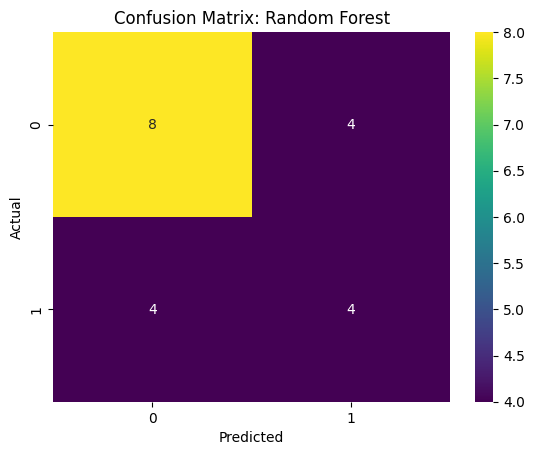

In [24]:
# Diffrent  Clssification models building and testing their  accuarcy nad show the confusion matrix of the all models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

models = { LogisticRegression(): 'Logistic Regression', SVC(): 'Support Vector Machine', DecisionTreeClassifier(): 'Decision Tree', KNeighborsClassifier(): 'K-Nearest Neighbors', RandomForestClassifier(): 'Random Forest' }  
for model in models.keys():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Model: {models[model]}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
    print('\n')
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.title(f'Confusion Matrix: {models[model]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



